# Infant Vision Transformations: Color and Acuity

In [1]:
from dataloader import InfantVisionDataset
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt


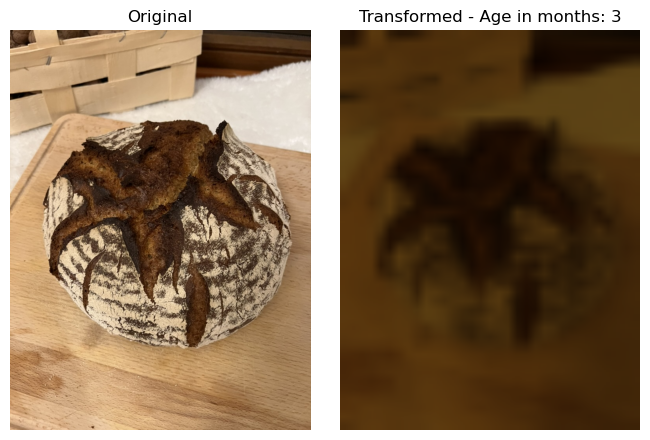

In [69]:
from PIL import Image
import matplotlib.pyplot as plt

# Instantiate the InfantVisionDataset with your photos
dataset = InfantVisionDataset(num_images=19, data_source="photos", transformation_type= "all", fixed_month=3)  # Use a single image for testing

# Retrieve the first image and display it
original_image, transformed_image, label, age = dataset[4]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
axes[0].set_position([0.05, 0.1, 0.45, 0.8])  # [left, bottom, width, height]
axes[1].set_position([0.38, 0.1, 0.45, 0.8])   # Adjust 'left' to bring closer

# Display the original image in the first subplot
axes[0].imshow(original_image.permute(1, 2, 0))
axes[0].set_title("Original")
axes[0].axis('off')  # Turn off axis

# Display the transformed image in the second subplot
axes[1].imshow(transformed_image.permute(1, 2, 0))
axes[1].set_title(f"Transformed - Age in months: {age}")
axes[1].axis('off')  # Turn off axis

plt.show()



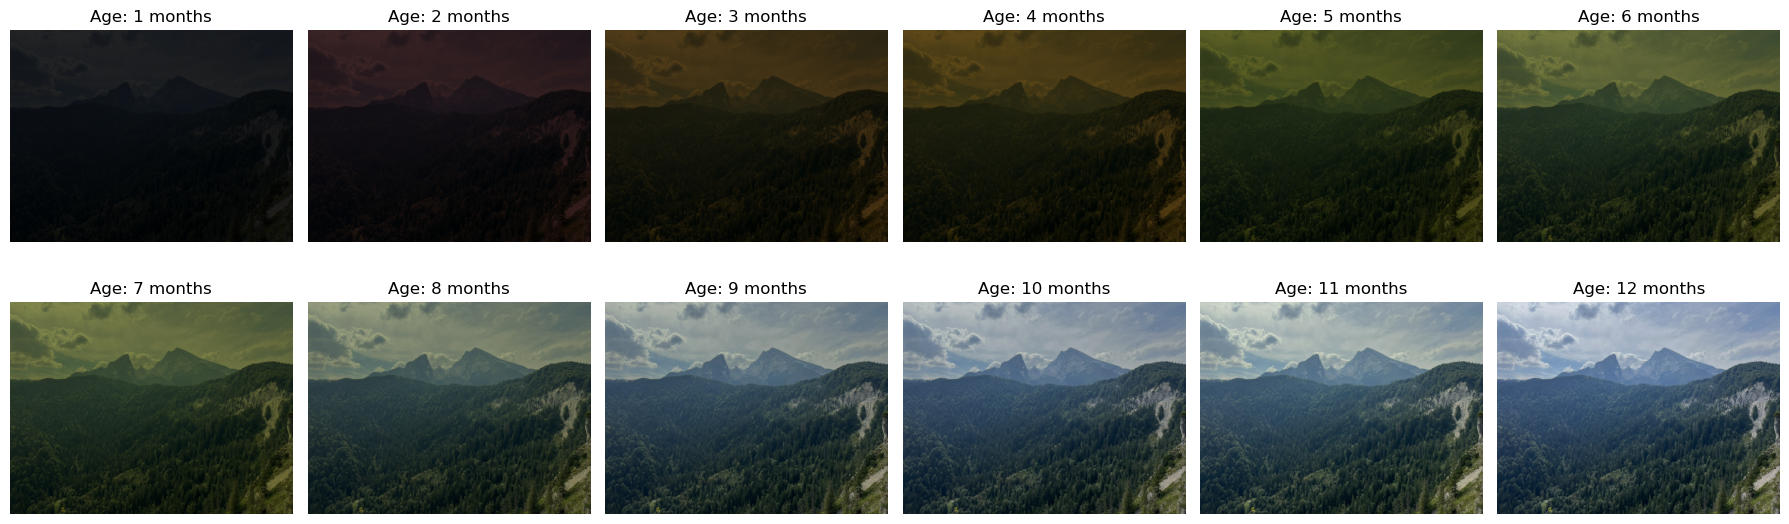

In [9]:
num_images = 3 

fig, axes = plt.subplots(2, 6, figsize=(18, 6))  # 2 rows, 6 columns


for month in range(12):
    # Get the transformed image for the current month
    dataset = InfantVisionDataset(num_images=3, data_source="photos", transformation_type="color", fixed_month=month)
    _, transformed_image, label, age = dataset[2]  # Get the first image for this month

    # Determine row and column for the current subplot
    row = month // 6
    col = month % 6

    # Display the transformed image in the appropriate subplot
    axes[row, col].imshow(transformed_image.permute(1, 2, 0))
    axes[row, col].set_title(f"Age: {age + 1} months")
    axes[row, col].axis('off')  # Turn off axis

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()




## Performance of Dataloader

The Dataloader is tested on 100 Images using the CIFAR Dataset. We test the performance of the loader without the transformation. With the color-transformation, acuity-transformation and both. 

Testing with transformation type: None
Files already downloaded and verified
Average load time with transformation 'None': 0.0097 seconds (std: 0.0004)
Testing with transformation type: all
Files already downloaded and verified
Average load time with transformation 'all': 0.0234 seconds (std: 0.0010)
Testing with transformation type: color
Files already downloaded and verified
Average load time with transformation 'color': 0.0210 seconds (std: 0.0009)
Testing with transformation type: acuity
Files already downloaded and verified
Average load time with transformation 'acuity': 0.0166 seconds (std: 0.0006)


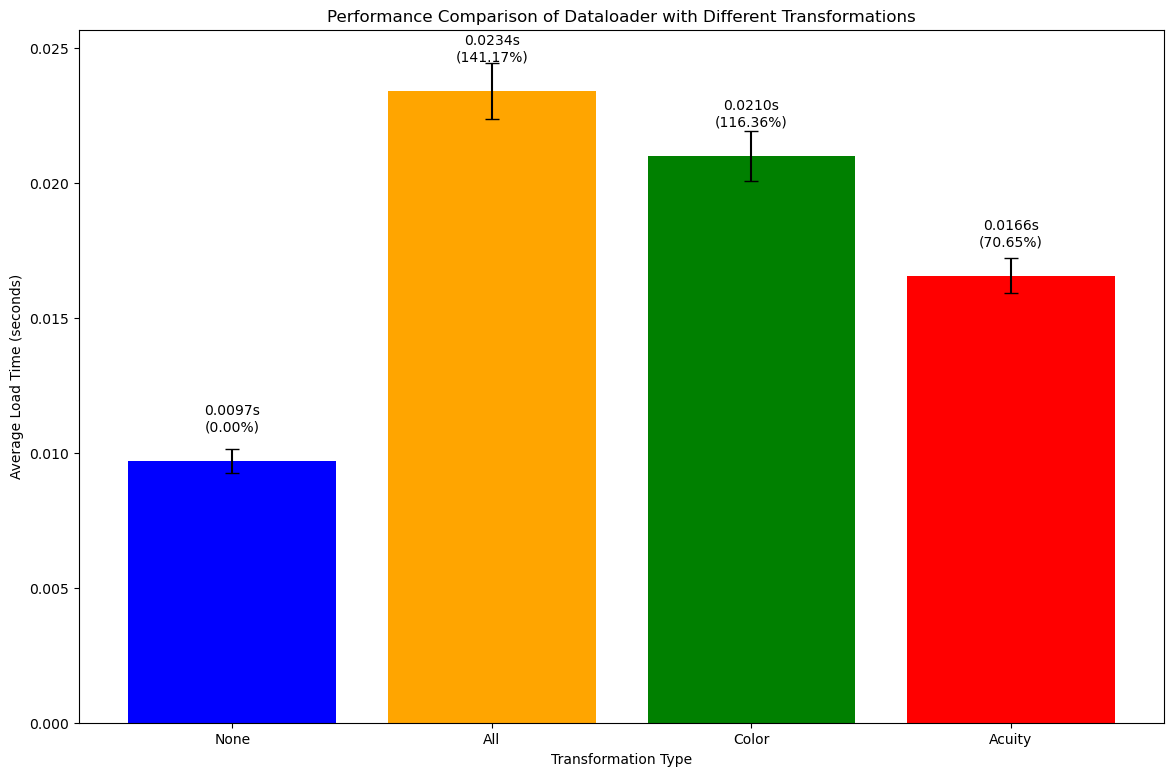

In [25]:
import time
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Function to measure loading time
def measure_load_time(dataloader, num_repeats=5):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        for batch in dataloader:
            pass  # Load the batch but do nothing with it
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)  # Return mean and standard deviation

# Define the different transformation types
transformation_types = [None, "all", "color", "acuity"]
results = {}

# Test each transformation type
for transform_type in transformation_types:
    print(f"Testing with transformation type: {transform_type}")

    # Instantiate the dataset and dataloader for the current transformation type
    dataset = InfantVisionDataset(num_images=100, data_source="CIFAR", transformation_type=transform_type)
    dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

    # Measure performance
    avg_load_time, std_dev = measure_load_time(dataloader)
    results[transform_type] = (avg_load_time, std_dev)
    print(f"Average load time with transformation '{transform_type}': {avg_load_time:.4f} seconds (std: {std_dev:.4f})")

# Extract results for plotting
transform_labels = ['None', 'All', 'Color', 'Acuity']
load_times = [results[transform][0] for transform in transformation_types]
std_devs = [results[transform][1] for transform in transformation_types]

# Calculate relative slowdowns compared to "None"
base_time = results[None][0]
slowdown_percentages = [(load_time / base_time - 1) * 100 if base_time else 0 for load_time in load_times]

# Plotting the load times with error bars for standard deviation
plt.figure(figsize=(14, 9))
bars = plt.bar(transform_labels, load_times, yerr=std_devs, color=['blue', 'orange', 'green', 'red'], capsize=5)

# Adding titles and labels
plt.title("Performance Comparison of Dataloader with Different Transformations")
plt.xlabel("Transformation Type")
plt.ylabel("Average Load Time (seconds)")

# Adding load time values and slowdown percentages on top of each bar
for i, (v, slowdown) in enumerate(zip(load_times, slowdown_percentages)):
    plt.text(i, v + 0.001, f"{v:.4f}s\n({slowdown:.2f}%)", ha='center', va='bottom')

plt.show()
